In [363]:
## imports
import pandas as pd
import numpy as np
import xarray as xr
from time import time

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import random


In [338]:
## Para guargar el modelo
'''
from joblib import dump, load
dump(clf, 'filename.joblib') # guardar
clf = load('filename.joblib') # cargar
'''

"\nfrom joblib import dump, load\ndump(clf, 'filename.joblib') # guardar\nclf = load('filename.joblib') # cargar\n"

In [339]:
## carga datos pruebas

df_atributos = pd.read_pickle('../pkls/dfAtributosNormalizado_2_dias_2_celdas.pkl')
df_avistamientos = pd.read_pickle('../pkls/dfAvistamientos.pkl')
df_avistamientos.head()
df_atributos.head()

,mlotst_0,zos_0,bottomT_0,thetao_0,so_0,uo_0,vo_0,mlotst_izq_1_0,zos_izq_1_0,bottomT_izq_1_0,...,so_inf_2.1_10,uo_inf_2.1_10,vo_inf_2.1_10,mlotst_inf_2.2_10,zos_inf_2.2_10,bottomT_inf_2.2_10,thetao_inf_2.2_10,so_inf_2.2_10,uo_inf_2.2_10,vo_inf_2.2_10
0,0.028272,0.484909,0.593375,0.393488,0.753866,0.265495,0.377426,0.044560,0.470527,0.578919,...,0.703526,0.535836,0.402959,0.017508,0.430021,0.320409,0.476941,0.670427,0.524089,0.240149
1,0.028272,0.564889,0.748738,0.600051,0.778454,0.335800,0.493170,0.023834,0.563082,0.792167,...,0.755449,0.484642,0.517160,0.015448,0.558761,0.207604,0.861387,0.755555,0.509988,0.422790
2,0.028272,0.430584,0.701932,0.391888,0.746007,0.418131,0.514019,0.022798,0.425026,0.727978,...,0.682051,0.395904,0.635503,0.003090,0.431624,0.305412,0.452228,0.659829,0.545241,0.567625
3,0.028272,0.425553,0.701025,0.380565,0.747275,0.455134,0.485262,0.022798,0.417787,0.729441,...,0.678205,0.408419,0.634911,0.003090,0.422543,0.300898,0.414153,0.655727,0.508813,0.598509
4,0.028272,0.450201,0.694401,0.550601,0.777440,0.284921,0.498922,0.023834,0.450879,0.802019,...,0.732692,0.439135,0.716568,0.006179,0.476496,0.198927,0.749822,0.719316,0.534665,0.571352


In [340]:
atributos = df_atributos
resultado = np.ravel(df_avistamientos)

In [341]:
atributos.shape,resultado.shape

((668, 231), (668,))

In [342]:
## Series temporales
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=10)
# print(tscv)

for train_index, test_index in tscv.split(df_atributos):
#     print("TRAIN:", train_index, "\n\tTEST:", test_index)
    X_train, X_test = df_atributos.iloc[train_index], df_atributos.iloc[test_index]
    y_train, y_test = df_avistamientos.iloc[train_index], df_avistamientos.iloc[test_index]


In [343]:
# tscv = TimeSeriesSplit(n_splits=10)
# forest(atributos,resultado,2,tscv)
# tscv = TimeSeriesSplit(n_splits=5)
# forest(atributos,resultado,2,tscv)
# tscv = TimeSeriesSplit(n_splits=2)
# forest(atributos,resultado,2,tscv)

# Random Forest

In [365]:
## random forest con series temporales

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
def forest(atributos,resultado,n,tscv):
    params = {'n_estimators': randint(1, 200),
               'max_depth': randint(1, 100),
              'max_features': randint(1,atributos.shape[1])}
    inicio = time()
    model_random = RandomizedSearchCV(estimator=RandomForestRegressor(), 
                           cv=tscv,
                           n_iter=n,
                           param_distributions=params,
                                      n_jobs = -1)

    model_random.fit(atributos, resultado)
    fin = time()

    tiempo = (fin - inicio)/60
    print('-Tiempo empleado para Random Forest: {} minutos'.format(tiempo), flush=True)
    print('Best_params: {}\nBest_score: {}'.format(model_random.best_params_,model_random.best_score_), flush=True)
    
    return tiempo,model_random

In [366]:
def forest_grid(atributos,resultado,k_n):
    params = {'n_estimators': [100,500,1000],
            'max_depth': [None,10,50,100],
            'max_features': ['auto','sqrt', 'log2']}
    inicio = time()
    model_random = GridSearchCV(estimator=RandomForestRegressor(), 
                           cv=k_n,
                           param_grid =params,
                           n_jobs = -1)

    model_random.fit(atributos, resultado)
    
    fin = time()
    tiempo = (fin - inicio)/60
    print('-Tiempo empleado para Random Forest: {} minutos'.format(tiempo), flush=True)
    print('Best_params: {}\nBest_score: {}'.format(model_random.best_params_,model_random.best_score_), flush=True)
    
    return tiempo,model_random

# Nearest Neighbor

In [367]:
## vecino mas cercano con series temporales

from sklearn.neighbors import KNeighborsRegressor
def vecino(atributos,resultado,n,tscv):

    # params = {'n_neighbors' : list(range(1,atributos.shape[1]))}
    params = {'n_neighbors' : list(range(1,60))}

    inicio = time()
    model_vecinos = RandomizedSearchCV(estimator=KNeighborsRegressor(), 
                           cv=tscv,
                           n_iter=n,
                           param_distributions=params,
                                      n_jobs = -1)


    model_vecinos.fit(atributos, resultado)
    fin = time()
    tiempo = (fin - inicio)/60
    print('-Tiempo empleado para Random Forest: {} minutos'.format(tiempo), flush=True)
    print('Best_params: {}\nBest_score: {}'.format(model_vecinos.best_params_,model_vecinos.best_score_), flush=True)
    
    return tiempo,model_vecinos

In [368]:

def vecino_grid(atributos,resultado,k_n):

    maxx = int(((atributos.shape[1]-1)/k_n.get_n_splits())*(k_n.get_n_splits()-1))
    params = {'n_neighbors' : random.sample(range(3, maxx), 10) ,
             'weights':['uniform', 'distance']}

    inicio = time()
    
    model_vecinos_grid= GridSearchCV(estimator=KNeighborsRegressor(), 
                           cv=k_n,
                           param_grid=params,
                           n_jobs = -1)


    model_vecinos_grid.fit(atributos, resultado)
    fin = time()
    tiempo = (fin - inicio)/60
    print('-Tiempo empleado para Random Forest: {} minutos'.format(tiempo), flush=True)
    print('Best_params: {}\nBest_score: {}'.format(model_vecinos_grid.best_params_,model_vecinos_grid.best_score_), flush=True)
    
    return tiempo,model_vecinos_grid

In [369]:
# model_vecinos.cv_results_


# SVM

In [370]:
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def SVR(atributos,resultado,k_n):

    params = {'svr__kernel':('linear', 'rbf','poly', 'sigmoid'),'svr__C' : [0.5,1.0,10,100], 
              'svr__epsilon':[0.2],'svr__gamma':['scale', 'auto'],}

    inicio = time()
    steps =  [('scaler',StandardScaler()), ('svr',svm.SVR())]
    pipeline = Pipeline(steps)


    model_SVR= GridSearchCV(estimator=svm.SVR(), 
                           cv=k_n,
                           param_grid=params,
                            n_jobs = -1)


    model_SVR.fit(atributos, resultado)
    fin = time()
    tiempo = (fin - inicio)/60
    print('-Tiempo empleado para SVR: {} minutos'.format(tiempo), flush=True)
    print('Best_params: {}\nBest_score: {}'.format(model_SVR.best_params_,model_SVR.best_score_), flush=True)
    
    return tiempo,model_SVR

In [371]:
# model_SVR.cv_results_

In [372]:
# model_SVR_grid.cv_results_

# Árboles de decisión

In [373]:
from sklearn.tree import DecisionTreeRegressor
def arbol_decision(atributos,resultadon,n,tscv):
    params = {'max_depth':list(range(1,50)),'max_features' : ['auto', 'sqrt', 'log2',None]}

    inicio = time()
    model_tree= RandomizedSearchCV(estimator=DecisionTreeRegressor(), 
                           cv=tscv,
                           n_iter=n,
                           param_distributions=params,
                            n_jobs = -1)


    model_tree.fit(atributos, resultado)
    fin = time()
    print('{} minutos'.format((fin - inicio)/60))
    print('{}\n{}'.format(model_tree.best_params_,model_tree.best_score_))
    return ['{} minutos \n'.format((fin - inicio)/60),model_tree.best_params_,model_tree.best_score_]

In [374]:
def arbol_decision_grid(atributos,resultadon,k_n):
    params = {'max_depth': random.sample(range(3, 200), 20),
              'max_features' : ['auto', 'sqrt', 'log2',None]}

    inicio = time()
    model_tree= GridSearchCV(estimator=DecisionTreeRegressor(), 
                           cv=k_n,
                           param_grid=params,
                            n_jobs = -1)


    model_tree.fit(atributos, resultado)
    fin = time()
    tiempo = (fin - inicio)/60
    print('-Tiempo empleado para arboles decision: {} minutos'.format(tiempo), flush=True)
    print('Best_params: {}\nBest_score: {}'.format(model_tree.best_params_,model_tree.best_score_), flush=True)
    
    return tiempo,model_tree

In [375]:
# model_tree.cv_results_

# Red Neuronal

## MLP

In [376]:
def MLP(atributos,resultado,k_n):

    params = {'alpha' : [0.00001,0.0001,0.001],
            'max_iter' : [1000,2000,5000],
            'random_state': [0,1,10]}

    inicio = time()

    model_MLP= GridSearchCV(estimator=MLPRegressor(), 
                           cv=k_n,
                           param_grid=params)


    model_MLP.fit(atributos, resultado)
    
    fin = time()
    tiempo = (fin - inicio)/60
    print('-Tiempo empleado para MLP: {} minutos'.format(tiempo), flush=True)
    print('Best_params: {}\nBest_score: {}'.format(model_MLP.best_params_,model_MLP.best_score_), flush=True)
    
    return tiempo,model_MLP

In [377]:
atributos.describe()

,mlotst_0,zos_0,bottomT_0,thetao_0,so_0,uo_0,vo_0,mlotst_izq_1_0,zos_izq_1_0,bottomT_izq_1_0,...,so_inf_2.1_10,uo_inf_2.1_10,vo_inf_2.1_10,mlotst_inf_2.2_10,zos_inf_2.2_10,bottomT_inf_2.2_10,thetao_inf_2.2_10,so_inf_2.2_10,uo_inf_2.2_10,vo_inf_2.2_10
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,...,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.041073,0.309653,0.610348,0.334054,0.664455,0.432030,0.504365,0.048621,0.301016,0.666412,...,0.577418,0.527978,0.578173,0.038609,0.285635,0.440186,0.348443,0.545809,0.528888,0.505152
std,0.065048,0.119846,0.093025,0.150555,0.113130,0.132660,0.163475,0.072797,0.118568,0.107568,...,0.126843,0.140078,0.183272,0.082772,0.114482,0.224055,0.173238,0.134399,0.131468,0.164769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.028272,0.242958,0.555126,0.238757,0.632383,0.355227,0.390906,0.023834,0.234100,0.635743,...,0.525561,0.439135,0.511391,0.004119,0.222756,0.237649,0.224914,0.493675,0.446533,0.447018
50%,0.028272,0.304829,0.602721,0.323183,0.670596,0.418131,0.513659,0.023834,0.298862,0.682275,...,0.573558,0.526166,0.612426,0.004119,0.288996,0.446807,0.340598,0.545299,0.531140,0.527157
75%,0.032461,0.378898,0.676341,0.412231,0.745373,0.505319,0.601546,0.036528,0.372285,0.717430,...,0.673478,0.613481,0.685207,0.028836,0.351496,0.661082,0.432980,0.646837,0.614571,0.599707
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Boosting

In [378]:
from sklearn.ensemble import GradientBoostingRegressor
def boosting(atributos,resultadon,n,tscv):
    params = {'n_estimators': randint(1, 200),
          'max_depth': randint(1, 100)}

    inicio = time()
    model_boos= RandomizedSearchCV(estimator=GradientBoostingRegressor(), 
                           cv=tscv,
                           n_iter=n,
                           param_distributions=params,
                           n_jobs = -1)


    model_boos.fit(atributos, resultado)
    fin = time()
    print('{} minutos'.format((fin - inicio)/60))
    print('{}\n{}'.format(model_boos.best_params_,model_boos.best_score_))
    return ['{} minutos \n'.format((fin - inicio)/60),model_boos.best_params_,model_boos.best_score_]

In [379]:
def boosting_grid(atributos,resultado,k_n):
    
    params = {'n_estimators': random.sample(range(3, 500), 5),
              'max_depth': random.sample(range(10, 200), 5)}

    inicio = time()
    
    model_boos= GridSearchCV(estimator=GradientBoostingRegressor(), 
                           cv=k_n,
                           param_grid=params,
                           n_jobs = -1)


    model_boos.fit(atributos, resultado)
    
    fin = time()
    tiempo = (fin - inicio)/60
    print('-Tiempo empleado para boosting: {} minutos'.format(tiempo), flush=True)
    print('Best_params: {}\nBest_score: {}'.format(model_boos.best_params_,model_boos.best_score_), flush=True)
    
    return tiempo,model_boos

In [380]:
# boosting(atributos,resultado,2,tscv) 

In [381]:
# df para guardar resultados
algoritmos  = ['random_forest','nearest_neighbor','nearest_neighbor_grid',
               'SVR','SVR_grid','arbol_decision', 'arbol_decision_grid',
               'MLP','Boosting','ensembles']
df = pd.DataFrame(index=algoritmos)

def reinicia_df():
    df = pd.DataFrame(index=algoritmos)
    df.to_pickle('resultados.pkl')

def guarda_resultado(alg,dias,celdas,split,resultado,params):
    df = pd.read_pickle('resultados.pkl')
    print(alg,dias,celdas,resultado,params)
    nombre_col = '{}_dias_{}_celdas_{}_splits'.format(dias,celdas,split)
    if not nombre_col in df.columns:
        df[nombre_col] = np.nan
        df[nombre_col + '_params'] = np.nan
    df.loc[alg,nombre_col] = resultado
    df.loc[alg,nombre_col + '_params'] = params
    df.to_pickle('resultados.pkl')

reinicia_df()
guarda_resultado('random_forest',1,2,0,3,'hola')
guarda_resultado('nearest_neighbor',1,2,0,4,'adios')
guarda_resultado('SVR',2,2,0,4,'salu2')
df 

random_forest 1 2 3 hola
nearest_neighbor 1 2 4 adios
SVR 2 2 4 salu2


""
random_forest
nearest_neighbor
nearest_neighbor_grid
SVR
SVR_grid
arbol_decision
arbol_decision_grid
MLP
Boosting
ensembles


In [382]:
a = pd.read_pickle('resultados.pkl')
a

,1_dias_2_celdas_0_splits,1_dias_2_celdas_0_splits_params,2_dias_2_celdas_0_splits,2_dias_2_celdas_0_splits_params
random_forest,3.0,hola,NaN,NaN
nearest_neighbor,4.0,adios,NaN,NaN
nearest_neighbor_grid,NaN,NaN,NaN,NaN
SVR,NaN,NaN,4.0,salu2
SVR_grid,NaN,NaN,NaN,NaN
arbol_decision,NaN,NaN,NaN,NaN
arbol_decision_grid,NaN,NaN,NaN,NaN
MLP,NaN,NaN,NaN,NaN
Boosting,NaN,NaN,NaN,NaN
ensembles,NaN,NaN,NaN,NaN


In [383]:
import os
from sklearn.model_selection import TimeSeriesSplit
import datetime

splits = [2,5,10]

res = ''
reinicia_df()
avistamientos = pd.read_pickle('../pkls/dfAvistamientos.pkl')
resultado = np.ravel(df_avistamientos)

listado_archivos = os.listdir('../pkls/')
df = pd.DataFrame(index=algoritmos)
for i in listado_archivos:
    for split in splits:
        tscv = TimeSeriesSplit(n_splits=split)
        if 'dfAtributosNormalizado' in i :
            atributos = pd.read_pickle('../pkls/{}'.format(i))
            dias,celdas = i[23:25],i[31:33]
            n_iter = 100
            print('\n\n' + i + '\n', flush=True)

            # concateno y guardo en log
            res += str(datetime.datetime.now()) + ' --------- ' +  str(i) + '\n'

            tiempo, model_result = forest_grid(atributos,resultado,tscv)
            guarda_resultado('random_forest',dias,celdas,split,model_result.best_score_,str(model_result.best_params_))
            res += '--> Random Forest ' + str(model_result) + '\nTiempo empleado: ' + str(tiempo)

#             model_result = vecino(atributos,resultado,n_iter,tscv)
#             guarda_resultado('nearest_neighbor',dias,celdas,split,model_result[2],str(model_result[1]))
#             res += '--> Vecino mas cercano ' + str(model_result) + '\n'

            tiempo, model_result = vecino_grid(atributos,resultado,tscv)
            guarda_resultado('vecino',dias,celdas,split,model_result.best_score_,str(model_result.best_params_))
            res += '--> vecino ' + str(model_result) + '\nTiempo empleado: ' + str(tiempo)

#             model_result = SVR(atributos,resultado,n_iter,tscv)
#             guarda_resultado('SVR',dias,celdas,split,model_result[2],str(model_result[1]))
#             res += '--> SVR ' + str(model_result) + '\n'

            tiempo, model_result = SVR_grid(atributos,resultado,tscv)
            guarda_resultado('svr',dias,celdas,split,model_result.best_score_,str(model_result.best_params_))
            res += '--> svr ' + str(model_result) + '\nTiempo empleado: ' + str(tiempo)

#             model_result = arbol_decision(atributos,resultado,tscv)
#             guarda_resultado('arbol',dias,celdas,split,model_result.best_score_,str(model_result.best_params_))
#             res += '--> Random Forest ' + str(model_result) + '\nTiempo empleado: ' + str(tiempo)

            tiempo, model_result = arbol_decision_grid(atributos,resultado,tscv)
            guarda_resultado('arbol',dias,celdas,split,model_result.best_score_,str(model_result.best_params_))
            res += '--> arbol ' + str(model_result) + '\nTiempo empleado: ' + str(tiempo)
            
            tiempo, model_result = boosting_grid(atributos,resultado,tscv)
            guarda_resultado('boosting',dias,celdas,split,model_result.best_score_,str(model_result.best_params_))
            res += '--> boosting ' + str(model_result) + '\nTiempo empleado: ' + str(tiempo)
            
            tiempo, model_result = MLP(atributos,resultado,tscv)
            guarda_resultado('MLP',dias,celdas,split,model_result.best_score_,str(model_result.best_params_))
            res += '--> MLP ' + str(model_result) + '\nTiempo empleado: ' + str(tiempo)

        f = open ('log.txt','wb')

        f.write(bytes(res, encoding='utf-8'))
        f.close()



dfAtributosNormalizado_0_dias_0_celdas.pkl



KeyboardInterrupt: 

In [384]:
import os
from sklearn.model_selection import TimeSeriesSplit
import datetime

splits = [2,5,10]

res = ''
reinicia_df()
avistamientos = pd.read_pickle('../pkls/dfAvistamientos.pkl')
resultado = np.ravel(df_avistamientos)

listado_archivos = os.listdir('../pkls/')
df = pd.DataFrame(index=algoritmos)
for i in listado_archivos:
    for split in splits:
        tscv = TimeSeriesSplit(n_splits=split)
        if 'dfAtributosNormalizado_2_dias_2_celdas.pkl' in i :
            atributos = pd.read_pickle('../pkls/{}'.format(i))
            dias,celdas = i[23:25],i[31:33]
            n_iter = 100
            print('\n\n' + i + '\n', flush=True)

            # concateno y guardo en log
            res += str(datetime.datetime.now()) + ' --------- ' +  str(i) + '\n'

            tiempo, model_result = forest_grid(atributos,resultado,tscv)
            guarda_resultado('random_forest',dias,celdas,split,model_result.best_score_,str(model_result.best_params_))
            res += '--> Random Forest ' + str(model_result) + '\nTiempo empleado: ' + str(tiempo)

#             model_result = vecino(atributos,resultado,n_iter,tscv)
#             guarda_resultado('nearest_neighbor',dias,celdas,split,model_result[2],str(model_result[1]))
#             res += '--> Vecino mas cercano ' + str(model_result) + '\n'

            tiempo, model_result = vecino_grid(atributos,resultado,tscv)
            guarda_resultado('vecino',dias,celdas,split,model_result.best_score_,str(model_result.best_params_))
            res += '--> vecino ' + str(model_result) + '\nTiempo empleado: ' + str(tiempo)

#             model_result = SVR(atributos,resultado,n_iter,tscv)
#             guarda_resultado('SVR',dias,celdas,split,model_result[2],str(model_result[1]))
#             res += '--> SVR ' + str(model_result) + '\n'

            tiempo, model_result = SVR_grid(atributos,resultado,tscv)
            guarda_resultado('svr',dias,celdas,split,model_result.best_score_,str(model_result.best_params_))
            res += '--> svr ' + str(model_result) + '\nTiempo empleado: ' + str(tiempo)

#             model_result = arbol_decision(atributos,resultado,tscv)
#             guarda_resultado('arbol',dias,celdas,split,model_result.best_score_,str(model_result.best_params_))
#             res += '--> Random Forest ' + str(model_result) + '\nTiempo empleado: ' + str(tiempo)

            tiempo, model_result = arbol_decision_grid(atributos,resultado,tscv)
            guarda_resultado('arbol',dias,celdas,split,model_result.best_score_,str(model_result.best_params_))
            res += '--> arbol ' + str(model_result) + '\nTiempo empleado: ' + str(tiempo)
            
            tiempo, model_result = boosting_grid(atributos,resultado,tscv)
            guarda_resultado('boosting',dias,celdas,split,model_result.best_score_,str(model_result.best_params_))
            res += '--> boosting ' + str(model_result) + '\nTiempo empleado: ' + str(tiempo)
            
            tiempo, model_result = MLP(atributos,resultado,tscv)
            guarda_resultado('MLP',dias,celdas,split,model_result.best_score_,str(model_result.best_params_))
            res += '--> MLP ' + str(model_result) + '\nTiempo empleado: ' + str(tiempo)

        f = open ('log.txt','wb')

        f.write(bytes(res, encoding='utf-8'))
        f.close()



dfAtributosNormalizado_2_dias_2_celdas.pkl

-Tiempo empleado para Random Forest: 1.363801391919454 minutos
Best_params: {'max_depth': 100, 'max_features': 'log2', 'n_estimators': 100}
Best_score: -0.02355187879666093
random_forest 2_ _c -0.02355187879666093 {'max_depth': 100, 'max_features': 'log2', 'n_estimators': 100}
-Tiempo empleado para Random Forest: 0.004000679651896159 minutos
Best_params: {'n_neighbors': 70, 'weights': 'uniform'}
Best_score: 0.018070486109085734
vecino 2_ _c 0.018070486109085734 {'n_neighbors': 70, 'weights': 'uniform'}


TypeError: SVR_grid() missing 1 required positional argument: 'tscv'

In [113]:
tscv = TimeSeriesSplit(n_splits=2)

from sklearn.tree import DecisionTreeRegressor


params = {'max_depth':[381],'max_features' : ['sqrt']}

inicio = time()
model_tree= GridSearchCV(estimator=DecisionTreeRegressor(), 
                       cv=tscv,
                       param_grid=params,
                        n_jobs = -1)


model_tree.fit(atributos, resultado)
fin = time()
print('{} minutos'.format((fin - inicio)/60))
print('{}\n{}'.format(model_tree.best_params_,model_tree.best_score_))

0.0005670428276062012 minutos
{'max_depth': 381, 'max_features': 'sqrt'}
-1.326596210342386


In [141]:
tscv = TimeSeriesSplit(n_splits=2)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

lista = [TimeSeriesSplit(n_splits=2),TimeSeriesSplit(n_splits=5),TimeSeriesSplit(n_splits=10)]
models = []

for i in lista :
    
    params = {'max_depth':list(range(1,1000)),'max_features' : ['auto', 'sqrt', 'log2',None]}

    inicio = time()
    model_tree= GridSearchCV(estimator=DecisionTreeRegressor(), 
                           cv=i,
                           param_grid=params,
                            n_jobs = -1)


    model_tree.fit(atributos, resultado)
    models.append(model_tree)
    fin = time()
    print('{} minutos'.format((fin - inicio)/60))
    print('{}\n{}'.format(model_tree.best_params_,model_tree.best_score_))
    # return ['{} minutos \n'.format((fin - inicio)/60),model_tree.best_params_,model_tree.best_score_]

0.5677285353342693 minutos
{'max_depth': 223, 'max_features': 'log2'}
0.19443376814711577
1.3161501208941142 minutos
{'max_depth': 2, 'max_features': 'sqrt'}
-0.15865642250286363
2.632586375872294 minutos
{'max_depth': 616, 'max_features': 'sqrt'}
-0.5232034053092856


In [139]:
from joblib import dump, load
dump(model_tree, 'modelo023.joblib') 


['modelo023.joblib']

In [106]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit(n_splits=2)
print(tscv)

for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


TimeSeriesSplit(max_train_size=None, n_splits=2)
TRAIN: [0 1] TEST: [2 3]
TRAIN: [0 1 2 3] TEST: [4 5]


In [63]:
from sklearn.model_selection import cross_val_score

# cross_val_score(model_vecinos_grid,atributos,resultado)

In [50]:
## comaprativa con y sin gridSearch

In [61]:
tscv = TimeSeriesSplit(n_splits=2)
params = {'max_depth':list(range(1,50)),'max_features' : ['auto', 'sqrt', 'log2',None]}

model_tree= GridSearchCV(estimator=DecisionTreeRegressor(), 
                       cv=tscv,
                       param_grid=params,
                        n_jobs = -1)
model_tree.fit(atributos, resultado)
model_tree.best_score_

0.20478600820699677

In [62]:
model_tree= DecisionTreeRegressor()

cross_val_score(model_tree,atributos, resultado,cv=tscv).mean()

-0.794389033577873

## genero lista playas

In [161]:
# cargo excel avistamientos
df_avistamientos = pd.read_excel('../#ExcelsAvistamientosIniciales/Datos_Physalia_20171010.xls')
df_avistamientos = df_avistamientos.loc[df_avistamientos['Tipo.Abund'] == 'numero']

In [162]:
df_avistamientos

,ID,Region,Lugar,Lat.Grad,Lat.Min,Lat.Seg,Long.Grad,Long.Min,Log.Seg,Lat.dec,Long.dec,Date,Year,Origen,Abundancia,Tipo.Abund,Momento,Observaciones
0,1,Arica,Playa.Chinchorro,18.0,27.0,47.00,70.0,18.0,19.00,18.463056,70.305278,2014-05-01,2014,Cap.Puerto,1,numero,Varadas,Colonias
1,1,Antofagasta,Taltal,25.0,24.0,0.00,70.0,29.0,0.00,25.400000,70.483333,2014-05-01,2014,Cap.Puerto,1,numero,Varadas,Colonias
2,2,Atacama,Playa.Mansa,27.0,3.0,57.05,70.0,49.0,33.37,27.065847,70.825936,2014-05-09,2014,Cap.Puerto,13,numero,Varadas,Colonias
3,3,Arica,Caleta.Quiane,18.0,29.0,36.00,70.0,19.0,34.00,18.493333,70.326111,2014-05-10,2014,Cap.Puerto,15,numero,Varadas,Colonias
4,3,Atacama,Las.Machas,27.0,7.0,19.19,70.0,51.0,27.38,27.121997,70.857606,2014-05-10,2014,Cap.Puerto,23,numero,Varadas,Colonias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,296,Valparaíso,Quintero_Ventanas,34.0,45.0,22.14,71.0,29.0,12.89,34.756150,71.486914,2017-05-08,2017,Cap.Puerto,700,numero,Varadas,Colonias
1211,296,Los.Lagos,Ancud_Playa.Rosaura,41.0,51.0,30.05,74.0,1.0,14.77,41.858347,74.020769,2017-05-08,2017,Cap.Puerto,20,numero,Varadas,Colonias
1218,298,Valparaíso,Viña.del .Mar_Caleta.Abarca,33.0,1.0,22.39,71.0,34.0,10.33,33.022886,71.569536,2017-05-10,2017,Cap.Puerto,33,numero,Varadas,Colonias
1220,299,Los.Lagos,Chacao_Playa.Chacao.Viejo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-16,2017,Cap.Puerto,80,numero,Varadas,Colonias


In [163]:
df_playas = df_avistamientos[['Lugar','Lat.dec','Long.dec']].reset_index().set_index(['Lugar'])

df_playas

,index,Lat.dec,Long.dec
Lugar,,,
Playa.Chinchorro,0,18.463056,70.305278
Taltal,1,25.400000,70.483333
Playa.Mansa,2,27.065847,70.825936
Caleta.Quiane,3,18.493333,70.326111
Las.Machas,4,27.121997,70.857606
...,...,...,...
Quintero_Ventanas,1210,34.756150,71.486914
Ancud_Playa.Rosaura,1211,41.858347,74.020769
Viña.del .Mar_Caleta.Abarca,1218,33.022886,71.569536


In [164]:
# me quedo con la playa que mas avistamientos tiene
df_count = df_avistamientos.groupby(['Lugar']).count()
df_count = df_count['Observaciones']

In [165]:
df_count.sort_values(ascending=False)

Lugar
Caldera_Playa.Las.Machas          24
Playa.Maule                       22
Caldera_Playa.Rodillo             19
Papudo                            16
Caldera_Playa.Brava               16
                                  ..
Maullin_Playa.Quillagua            1
Maullin_Playa.Pangal               1
Maule                              1
Maitencillo_Playa.Los.Pocitos      1
 Canela_Playa.Agua.de.la.Zorra     1
Name: Observaciones, Length: 317, dtype: int64

In [166]:
df_playas2 = df_playas.join(df_count,lsuffix="I",rsuffix="R").sort_values(by=[ 'Observaciones'])
df_playas2 = df_playas2[['Lat.dec','Long.dec','Observaciones']]
df_playas2 = df_playas2.drop_duplicates()
df_playas2.to_pickle('playas.pkl')

## compara modelo con historico

In [288]:

df_atributos = pd.read_pickle('../pkls/dfAtributosNormalizado_2_dias_2_celdas.pkl')
df_avistamientos = pd.read_pickle('../pkls/dfAvistamientos.pkl')
df_avistamientos.head()
df_atributos.head()

atributos = df_atributos
resultado = np.ravel(df_avistamientos)


atributos.shape,resultado.shape

((668, 231), (668,))

In [279]:
# playa con mas avistmaientos = Playa.Maule
# cargo excel avistamientos
df_avistamientos = pd.read_excel('../#ExcelsAvistamientosIniciales/Datos_Physalia_20171010.xls')
df_avistamientos = df_avistamientos.loc[df_avistamientos['Lugar'] == 'Playa.Maule']
df_avistamientos = df_avistamientos.loc[df_avistamientos['Tipo.Abund'] == 'numero']
df_avistamientos = df_avistamientos[['Lugar','Lat.dec','Long.dec','Date','Abundancia']]
df_avistamientos

,Lugar,Lat.dec,Long.dec,Date,Abundancia
827,Playa.Maule,38.810664,73.405136,2016-02-21,13
935,Playa.Maule,38.810664,73.405136,2017-01-17,653
937,Playa.Maule,38.810664,73.405136,2017-01-18,25
939,Playa.Maule,38.810664,73.405136,2017-01-19,29
1021,Playa.Maule,38.810664,73.405136,2017-02-25,80
1031,Playa.Maule,38.810664,73.405136,2017-02-26,434
1035,Playa.Maule,38.810664,73.405136,2017-02-27,48
1037,Playa.Maule,38.810664,73.405136,2017-02-28,105
1047,Playa.Maule,38.810664,73.405136,2017-03-01,18
1049,Playa.Maule,38.810664,73.405136,2017-03-02,3


In [280]:
def redondeo(coordenadas, base=1/12):
    """
    Devuelve las coordenadas pasadas redondeadas
    
    Parametros:
    coordenadas -- lista de latitud y longitud
    base -- base del redondeo
    """
    return  base * round(coordenadas/base)

In [281]:
redondeo(38.810664)

38.83333333333333

In [282]:
# cargo estructura de datos
df_excel1 = pd.read_excel('../Excels/3estruct_2dias_2celdas.xlsx')
df_excel1 = df_excel1.loc[df_excel1['Latitud'] == -redondeo(38.810664)]
df_excel1 = df_excel1.loc[df_excel1['Longitud'] == -redondeo(73.405136)]
df_excel1
lista = list()
contador = 0
for i,j in df_excel1.iterrows():
#     print(i)
    if contador%3 == 0:
        lista.append(i)
    contador += 1
lista # lista de las filas que tengo que sacar del excel normalizado
lista2 = [int(i/3) for i in lista]
lista2,lista

([483,
  553,
  554,
  555,
  589,
  594,
  598,
  600,
  602,
  608,
  611,
  613,
  614,
  615,
  617,
  619,
  622,
  625,
  629,
  632,
  634,
  636],
 [1449,
  1659,
  1662,
  1665,
  1767,
  1782,
  1794,
  1800,
  1806,
  1824,
  1833,
  1839,
  1842,
  1845,
  1851,
  1857,
  1866,
  1875,
  1887,
  1896,
  1902,
  1908])

In [283]:
listado_avistamientos = df_excel1.loc[lista]['Avistamientos']
listado_avistamientos.values

array([ 13, 659,  40,  29, 130, 437,  48, 105,  25,   3,  61,  72,  63,
       203, 164, 178,  13,  19,   5,  45,  17,  73], dtype=int64)

In [284]:
# estructura de datos normalizada
df_excel2 = pd.read_excel('../Excels/dfAtributosNormalizado_2_dias_2_celdas.xlsx')
print(df_excel2.shape)
df_excel2 = df_excel2.take(lista2, axis=0)
df_excel2 = df_excel2.drop(columns=['Unnamed: 0'])

(668, 232)


In [296]:
resultado3434 =  np.delete(resultado, lista2)
resultado3434

array([   1,    1,   13,   23,   15,    2,    2,    1,    1,    1,    1,
          1,    1,    1,    1,    1,   15,    1,    1,    1,    1,    1,
          1,   43,   43,    2,   27,   27,    2,    4,   50,    1,   11,
         11,   50,    1,    4,    7,    7,    1,   12,   16,   17,   16,
         12,    1,   17,    1,    3,    3,   60,   70,   30,    8,   18,
          5,   61,   10,    1,    1,   21,    1,   10,    1,   10,    1,
          1,   30,    1,   30,    1,    1,    1,    1,    1,    1,    1,
          1,  357,  505,  435,  400,   30,   35,  471,  320,  151, 1021,
         27,  176,   21,  824,   81,   61,   98,  276,   60,   21,  393,
       1020,    6,    4,  200,  253,  315,  570,   13,   10,    3,  100,
         12,   11,    5,    4,    1,   10,   25,   24,    6,    1,    7,
          1,    1,    1,    3,    1,    1,    1,    2,   35,   27,   70,
          4,    7,   12,   72,   96,    1, 2150,   50,    8,    6,    7,
         31,   14,   20,   16,   21,  151,   29,   

In [308]:
lista = [TimeSeriesSplit(n_splits=2)]
models = []
print(atributos.shape,resultado.shape)
atributos2 = atributos.drop(atributos.index[lista2])
resultado2 = np.delete(resultado,lista2)

for i in lista :
    
    params = {'max_depth':list(range(1,1000)),'max_features' : ['auto', 'sqrt', 'log2',None]}

    inicio = time()
    model_tree= GridSearchCV(estimator=DecisionTreeRegressor(), 
                           cv=i,
                           param_grid=params,
                            n_jobs = -1)


    model_tree.fit(atributos2, resultado2)
    models.append(model_tree)
    fin = time()
    print('{} minutos'.format((fin - inicio)/60))
    print('{}\n{}'.format(model_tree.best_params_,model_tree.best_score_))
    # return ['{} minutos \n'.format((fin - inicio)/60),model_tree.best_params_,model_tree.best_score_]

(668, 231) (668,)
0.5098008116086324 minutos
{'max_depth': 667, 'max_features': 'sqrt'}
0.18545860940223508


In [309]:
from joblib import dump, load
dump(model_tree, 'modelo__.joblib') 

['modelo__.joblib']

In [310]:
from joblib import load

# cargo modelo38,811

modelo = load('modelo__.joblib')

In [311]:
salida = modelo.predict(df_excel2)

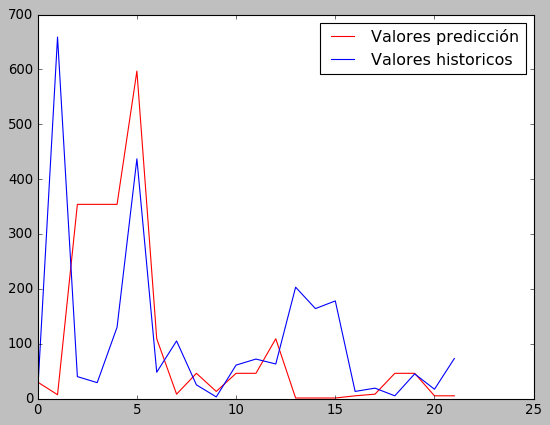

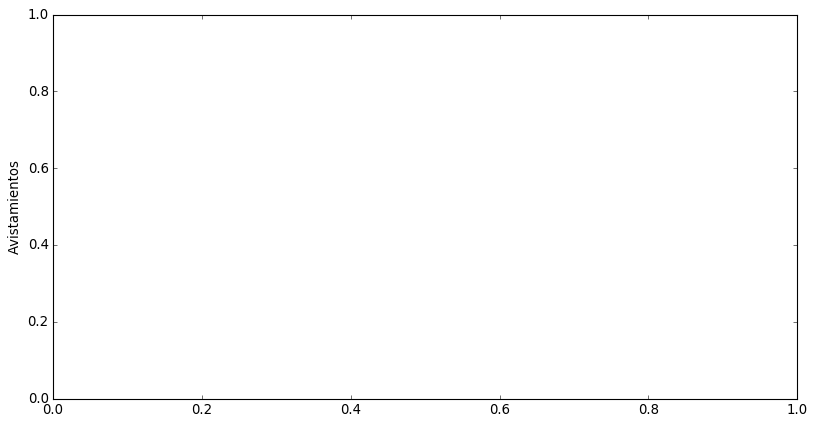

In [332]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
fig, ax = plt.subplots()
# figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
line1, = ax.plot(salida, 'r',label= 'Valores predicción')
line2, = ax.plot(listado_avistamientos.values, label= 'Valores historicos')
plt.ylabel('Avistamientos')
leg = ax.legend();

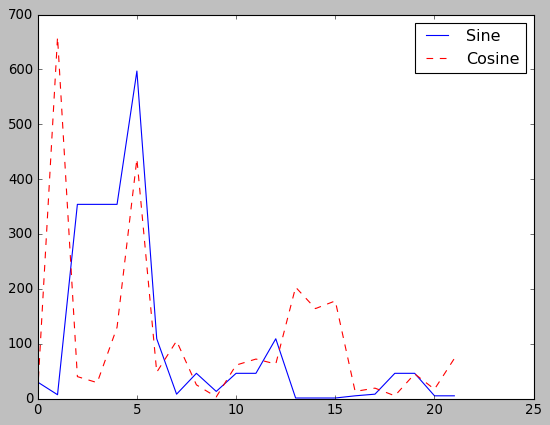

In [326]:
import matplotlib.pyplot as plt
# plt.style.use('classic')
# %matplotlib inline
import numpy as np
# x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(salida, '-b', label='Sine')
ax.plot(listado_avistamientos.values, '--r', label='Cosine')
# ax.axis('equal')
leg = ax.legend();

In [335]:
res = pd.read_pickle('resultados.pkl')
res.to_excel('resultados.xlsx')